In [1]:
import pandas as pd
import anndata as ad
import numpy as np
import gseapy



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.

In [2]:
deg_data_path = "/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/"

# Gene Set Enrichment Analysis

## Males 50-70 yo.

In [34]:
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")

In [35]:

mask = ((ppmi_ad.obs['Age_Group'] == '50-70') &
        (ppmi_ad.obs['Gender'] == 'Male') &
        (ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])))
ppmi_ad = ppmi_ad[mask]

In [5]:
symbol_ensembl_mapping = ppmi_ad.varm['symbol_ensembl_mapping']

In [6]:
deg_males_50_70 = pd.read_csv(f"{deg_data_path}/DEGs_stratified_Male_BL_50-70.csv", index_col=0)

In [7]:
deg_males_50_70 = deg_males_50_70.merge(symbol_ensembl_mapping, left_index=True, right_index=True)

In [8]:
deg_sign = deg_males_50_70[(np.abs(deg_males_50_70['log2FoldChange']) >= 0.5) & (deg_males_50_70['padj'] <= 0.05)]

In [9]:
ranked_genes = deg_sign.set_index('gene_symbol')['stat'].sort_values(ascending=False)

In [10]:
ranked_genes = ranked_genes[~ranked_genes.isna()]

In [11]:
ranked_genes

gene_symbol
RN7SL60P           5.686495
LINC03126          4.588187
ENSG00000281741    4.451634
LINC00355          4.382978
SEC14L5           -3.940068
ENSG00000261003   -3.952822
ENSG00000275898   -3.989781
PTPRG             -4.005222
FOSB              -4.030188
COL11A2           -4.034842
FAM186B           -4.064581
RN7SL564P         -4.067679
AP3B2             -4.086733
MPL               -4.169189
SAMD14            -4.177679
HBA2              -4.199735
GP1BA             -4.203020
HSALR1            -4.247269
RN7SL126P         -4.258760
H2AC5P            -4.268572
RN7SL210P         -4.314149
LOC124908527      -4.339488
VWCE              -4.468228
ENSG00000262495   -4.564740
EGR1              -4.631282
RN7SL664P         -4.708417
RNVU1-32          -4.848939
ENSG00000278917   -5.027044
NRGN              -5.108393
RNU1-2            -5.286429
RN7SL692P         -5.573591
RN7SKP90          -5.686595
KRT79             -6.372922
XIST              -7.444316
Name: stat, dtype: float64

https://www.gsea-msigdb.org/gsea/msigdb/human/collections.jsp#H

In [12]:
ranked_genes = ranked_genes.dropna()
ranked_genes = ranked_genes.sort_values(ascending=False, key=abs)

In [13]:
ranked_genes

gene_symbol
XIST              -7.444316
KRT79             -6.372922
RN7SKP90          -5.686595
RN7SL60P           5.686495
RN7SL692P         -5.573591
RNU1-2            -5.286429
NRGN              -5.108393
ENSG00000278917   -5.027044
RNVU1-32          -4.848939
RN7SL664P         -4.708417
EGR1              -4.631282
LINC03126          4.588187
ENSG00000262495   -4.564740
VWCE              -4.468228
ENSG00000281741    4.451634
LINC00355          4.382978
LOC124908527      -4.339488
RN7SL210P         -4.314149
H2AC5P            -4.268572
RN7SL126P         -4.258760
HSALR1            -4.247269
GP1BA             -4.203020
HBA2              -4.199735
SAMD14            -4.177679
MPL               -4.169189
AP3B2             -4.086733
RN7SL564P         -4.067679
FAM186B           -4.064581
COL11A2           -4.034842
FOSB              -4.030188
PTPRG             -4.005222
ENSG00000275898   -3.989781
ENSG00000261003   -3.952822
SEC14L5           -3.940068
Name: stat, dtype: float64

In [18]:
all_dbs = gseapy.get_library_name()
tf_dbs = [db for db in all_dbs if 'TF' in db or 'ChEA' in db or 'TRRUST' in db]

In [19]:
tf_dbs

['ARCHS4_TFs_Coexp',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'ENCODE_TF_ChIP-seq_2014',
 'ENCODE_TF_ChIP-seq_2015',
 'ENCODE_and_ChEA_Consensus_TFs_from_ChIP-X',
 'Enrichr_Submissions_TF-Gene_Coocurrence',
 'TF-LOF_Expression_from_GEO',
 'TF_Perturbations_Followed_by_Expression',
 'TRRUST_Transcription_Factors_2019']

In [20]:
import gseapy as gp
transcription_factor_sets = tf_dbs
enr = gp.enrichr(gene_list=ranked_genes.index.tolist(),
                 gene_sets=transcription_factor_sets,
                 organism='human')

In [21]:
enr_results_sorted = enr.results.sort_values(by='Adjusted P-value', ascending=True)

In [22]:
enr_results_sorted

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
3828,TF_Perturbations_Followed_by_Expression,GATA1 DELTAN MUTATION MOUSE GSE2433 CREEDSID G...,5/272,0.000090,0.048065,0,0,12.720522,118.451613,EGR1;MPL;FOSB;XIST;NRGN
3829,TF_Perturbations_Followed_by_Expression,KLF3 KO MOUSE GSE35592 CREEDSID GENE 2672 DOWN,4/180,0.000238,0.063383,0,0,14.992424,125.067758,MPL;FOSB;GP1BA;NRGN
4364,TRRUST_Transcription_Factors_2019,DMTF1 mouse,1/8,0.013522,0.071437,0,0,86.402597,371.830814,EGR1
4365,TRRUST_Transcription_Factors_2019,ATF5 human,1/8,0.013522,0.071437,0,0,86.402597,371.830814,EGR1
4367,TRRUST_Transcription_Factors_2019,SP4 mouse,1/8,0.013522,0.071437,0,0,86.402597,371.830814,NRGN
...,...,...,...,...,...,...,...,...,...,...
1500,ENCODE_TF_ChIP-seq_2014,RFX5 GM12878,4/5585,0.993509,0.999997,0,0,0.343666,0.002238,EGR1;FOSB;NRGN;PTPRG
1499,ENCODE_TF_ChIP-seq_2014,MAZ HEPG2,6/7088,0.993374,0.999997,0,0,0.389841,0.002592,EGR1;SAMD14;SEC14L5;FOSB;NRGN;PTPRG
1482,ENCODE_TF_ChIP-seq_2014,MAZ HELA-S3,4/5345,0.990352,0.999997,0,0,0.365100,0.003540,EGR1;SEC14L5;FOSB;NRGN
1481,ENCODE_TF_ChIP-seq_2014,CEBPB H1,3/4501,0.990040,0.999997,0,0,0.332793,0.003331,FOSB;AP3B2;PTPRG


### Excurse XIST Significantly Expressed in PPMI Data age group 50-70
___
It came into attention that XIST, a gene which transcript shouldn't be present that severely as detected in the present analysis for male participants, is present and expressed in Control and PD samples for males aged 50 to 70 years. The biological relevance is though highly questionable and the likelihood for the samples to be contaminated or otherwise perturbed by unknown and non-detectable batch effects might be well assumed. The very presence of this finding will be therefore be excluded from the results of the present analysis. Furthermore, the author has double-checked whether the consolidation of samples and the proper metadata is aligned with the gender from the original data and no mismatches were found. Apart from an assumed batch effect it seems as well in order to assume that a mislabeling could be probable, having female samples labeled wrongly as male ones. Yet, and quite interestingly, the perturbation seems to span across all visits.

In [90]:
symbol_ensembl_mapping[symbol_ensembl_mapping['gene_symbol'] == 'XIST'].index

Index(['ENSG00000229807.11'], dtype='object', name='ensembl_id')

Text(0.5, 1.0, 'XIST Expression in Male PD vs Controls')

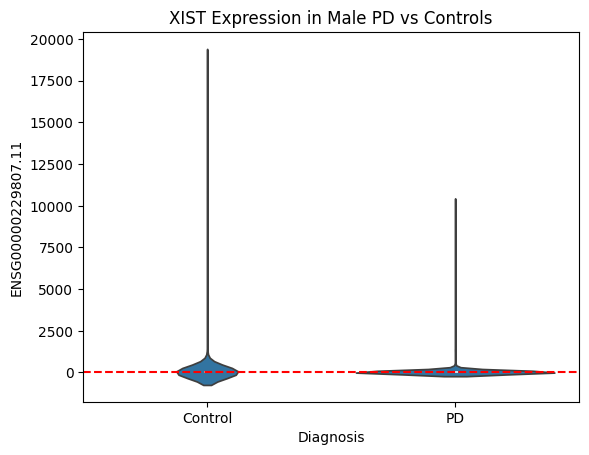

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
expression_data = ppmi_ad.to_df()
expression_data['Diagnosis'] = ppmi_ad.obs['Diagnosis']
sns.violinplot(x='Diagnosis', y='ENSG00000229807.11', data=expression_data)
plt.axhline(y=0, color='r', linestyle='--')  # Expected male baseline
plt.title("XIST Expression in Male PD vs Controls")

In [104]:
print("XIST expression summary:")
print(expression_data.groupby('Diagnosis')['ENSG00000229807.11'].describe())


XIST expression summary:
           count        mean          std  min  25%  50%    75%      max
Diagnosis                                                               
Control    360.0  143.905556  1211.502280  0.0  1.0  3.0  15.25  18665.0
PD         727.0   50.977992   415.879151  0.0  1.0  4.0  21.00  10223.0


/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_52958/2655181177.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(expression_data.groupby('Diagnosis')['ENSG00000229807.11'].describe())


Text(0.5, 1.0, 'XIST Expression in Male PD vs Controls')

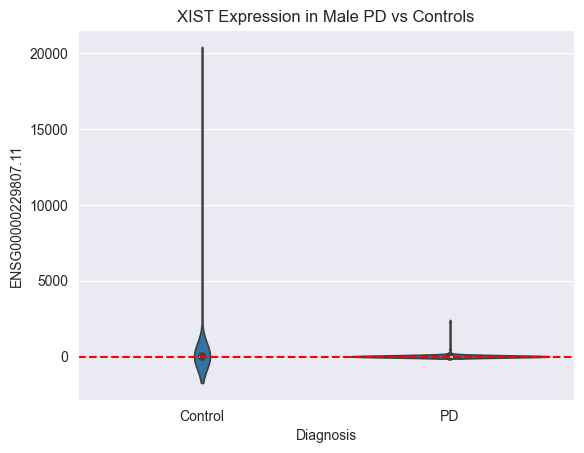

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
mask = (ppmi_ad.obs['Visit'] == 'BL')
ppmi_ad_bl = ppmi_ad[mask]
expression_data = ppmi_ad_bl.to_df()
expression_data['Diagnosis'] = ppmi_ad_bl.obs['Diagnosis']
sns.violinplot(x='Diagnosis', y='ENSG00000229807.11', data=expression_data)
plt.axhline(y=0, color='r', linestyle='--')  # Expected male baseline
plt.title("XIST Expression in Male PD vs Controls")

In [31]:
print("XIST expression summary:")
print(expression_data.groupby('Diagnosis')['ENSG00000229807.11'].describe())


XIST expression summary:
           count       mean         std  min  25%  50%    75%     max
Diagnosis                                                            
Control     76.0  62.986842  303.981249  0.0  2.0  4.5  10.75  2436.0
PD         113.0  52.548673  202.275669  0.0  2.0  5.0  26.00  1484.0


/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_4912/2655181177.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(expression_data.groupby('Diagnosis')['ENSG00000229807.11'].describe())


Text(0.5, 1.0, 'XIST Expression in Male PD vs Controls')

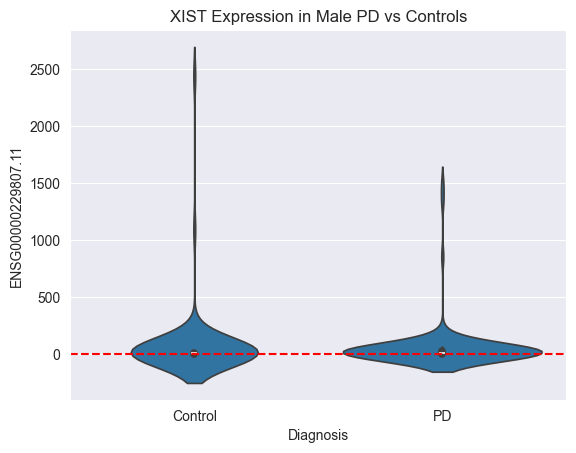

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
mask = (ppmi_ad.obs['Visit'] == 'V02')
ppmi_ad_v02 = ppmi_ad[mask]
expression_data = ppmi_ad_v02.to_df()
expression_data['Diagnosis'] = ppmi_ad_v02.obs['Diagnosis']
sns.violinplot(x='Diagnosis', y='ENSG00000229807.11', data=expression_data)
plt.axhline(y=0, color='r', linestyle='--')  # Expected male baseline
plt.title("XIST Expression in Male PD vs Controls")

Text(0.5, 1.0, 'XIST Expression in Male PD vs Controls')

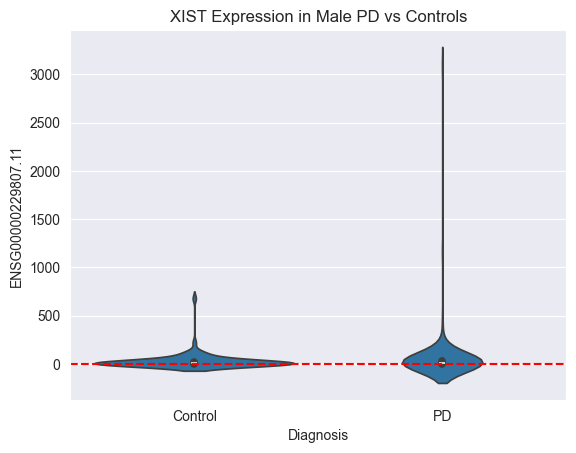

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
mask = (ppmi_ad.obs['Visit'] == 'V04')
ppmi_ad_v04 = ppmi_ad[mask]
expression_data = ppmi_ad_v04.to_df()
expression_data['Diagnosis'] = ppmi_ad_v04.obs['Diagnosis']
sns.violinplot(x='Diagnosis', y='ENSG00000229807.11', data=expression_data)
plt.axhline(y=0, color='r', linestyle='--')  # Expected male baseline
plt.title("XIST Expression in Male PD vs Controls")

Text(0.5, 1.0, 'XIST Expression in Male PD vs Controls')

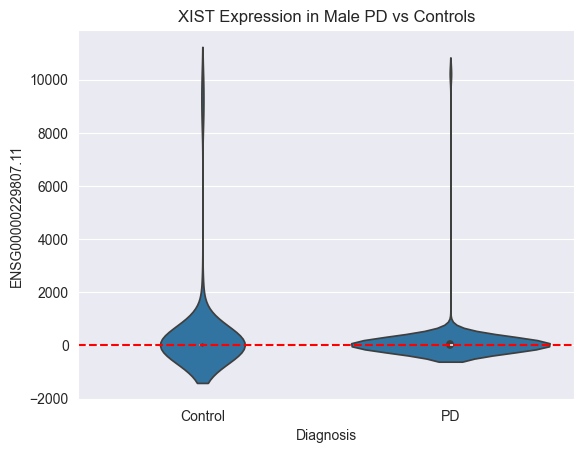

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
mask = (ppmi_ad.obs['Visit'] == 'V06')
ppmi_ad_v06 = ppmi_ad[mask]
expression_data = ppmi_ad_v06.to_df()
expression_data['Diagnosis'] = ppmi_ad_v06.obs['Diagnosis']
sns.violinplot(x='Diagnosis', y='ENSG00000229807.11', data=expression_data)
plt.axhline(y=0, color='r', linestyle='--')  # Expected male baseline
plt.title("XIST Expression in Male PD vs Controls")

Text(0.5, 1.0, 'XIST Expression in Male PD vs Controls')

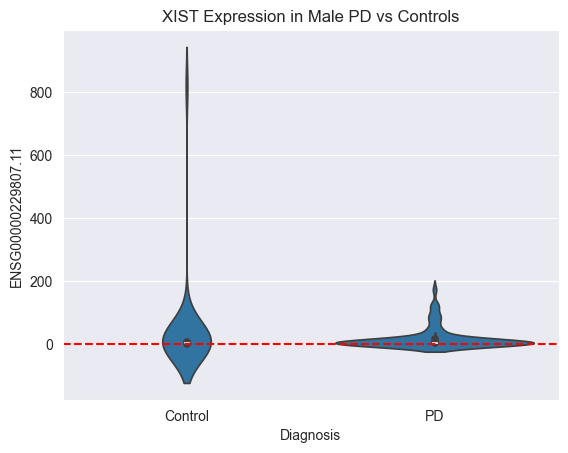

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
mask = (ppmi_ad.obs['Visit'] == 'V08')
ppmi_ad_v08 = ppmi_ad[mask]
expression_data = ppmi_ad_v08.to_df()
expression_data['Diagnosis'] = ppmi_ad_v08.obs['Diagnosis']
sns.violinplot(x='Diagnosis', y='ENSG00000229807.11', data=expression_data)
plt.axhline(y=0, color='r', linestyle='--')  # Expected male baseline
plt.title("XIST Expression in Male PD vs Controls")

In [32]:
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")
mask = ((ppmi_ad.obs['Age_Group'] == '50-70') &
        (ppmi_ad.obs['Gender'] == 'Female') &
        (ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])))
ppmi_ad_females = ppmi_ad[mask]

Text(0.5, 1.0, 'XIST Expression in Male PD vs Controls')

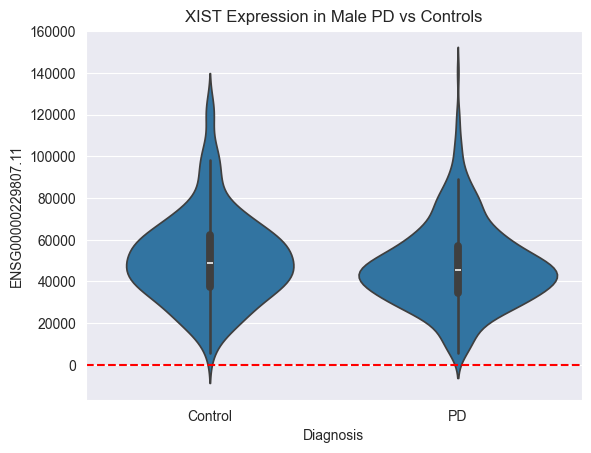

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
expression_data = ppmi_ad_females.to_df()
expression_data['Diagnosis'] = ppmi_ad_females.obs['Diagnosis']
sns.violinplot(x='Diagnosis', y='ENSG00000229807.11', data=expression_data)
plt.axhline(y=0, color='r', linestyle='--')  # Expected male baseline
plt.title("XIST Expression in Male PD vs Controls")